#Linear Regression
Simple ML model which predicts by drawing a best fit line through the data.\
\
$$m = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$
$$b = \bar{y} - m\bar{x}$$

##Regression metrics
1. Mean absolute Error - Calculates the average of absolute difference between the predicted data and the actual result.
> Robust to outliers\
It is non-differentiable at 0 as it uses mod function on the difference.

2. Root Mean Squared Error/ Mean squared Error -  Calculates root of the average of squared difference between the predicted data and the actual result. Then we have to decrease this area to decrease the error.
> Penalises the outliers too much. Hence not robust for outliers.\
Can be used as a **LOSS FUNCTION**
\
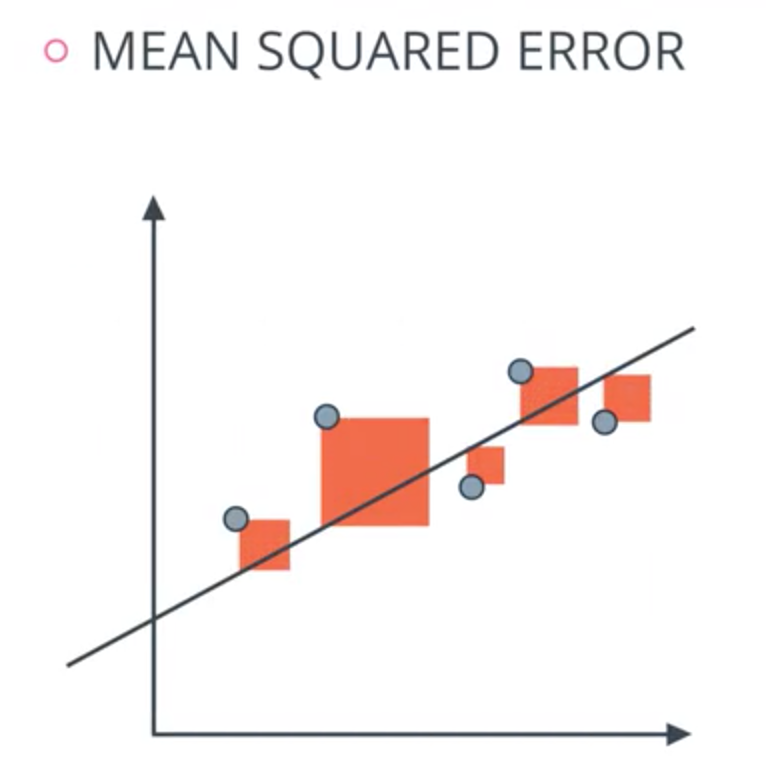



##R2 score
It is used to define how much of the outcome is represent by the given data.It varies between 0 and 1. \
Formula= 1-(SSr/SSm)\
SSr = Sum of Squared error in regression line\
SSm = Sum of squared error in mean line.
```
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(X_test)
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
```
##Adjusted R2 score
R²<sub>adjusted</sub> = $$1 -  \frac{(1 - R^2)(N - 1)}{N - p - 1} $$
where\
R² = sample R-square\
p = Number of predictors\
N = Total sample size.
```
# print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
```

## Multiple Linear Regression

Here we operate in multi dimantional data and the formula used here to draw a plane in case of 3D data and hyperplane in case of higher dimensions.\
Given formula is used to calculate a plane in case of 3D data.
\
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

The formula given below is used for calculating hyperplane in case of a 7D data but we can extrapolate on the similar lines for even more dimensions when we have data that have even more no of columns\
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \beta_5x_5 + \beta_6x_6$$

To calculate this $\beta$ we use\
Ordinary Least Squares Estimate

$$ \hat{\beta} = (X^TX)^{-1}X^Ty $$



In linear regression we can use 2 different methods to decrease our LOSS/ERROR.
1. **OLS (Ordinary Least Square)** - This method uses the above mentioned formulas to impliment linear regression.\
 * To use OLS we import LinearRegression in ScikitLearn.
 * The slope calculated by OLS can be extracted.
 * The intercept value or the beta(not) is also calculated by OLS can be extracted.


```
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
reg.coef_                             Slope
reg.intercept_                        beta(not)
```

2. **Gradient decent** - This is a method which can be used when we have a bigger data set or data with a lot of columns.\
To use Gradient Decent we use SGDRegressor in ScikitLearn.\
\
Despite of having OLS in Scikit learn we use the Gradien tdecent methd because the OLS method uses inversion of matrix to calculate the beta. This operation has a time complexity of n^3 making OLS super computation heavy algorithm.

##Assumptins of Linear Regression
1. **Linear Relationship** in the data
2. There should be very less or no **Multi Colinearity** in the data set.\
This is because ${β}$ defines the importance of a feature in a hyperplane, Multi-colinearity can disturb it role.\
**To check fot multi colinearity:**\
(vif should be around 1 and less than 5 is OK, mre than makes the feature/column useless)
```
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
vif.append(variance_inflation_factor(X_train, i))
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T
```
3. Residual should be normally distributed.Can be checked using kde plot.
4. **Homoscedasticity**- this means that when we keep the residual at y-axis and the predictions on the x-axis, graph is evenly scattered throughout.
5. There should be no autocorrelation in the error.  

#Gradient Decent
Here we will decent with an initial random value of beta/slope/intercept and to find the minimum value, so that the error can be minimized.
* To do this, first we have to find a constant value for no. of epochs i.e the no. of time we want to iterate to find the min.
* Secondly, we have to find the slope at our random point.\
slope = -2$$(\sum_{i=1}^{n}(y_i - mx_i - b))$$
* Then choose the learning rate which is generally 0.01.
* (Learning rate * slope) is called step size for our gradient decent.
\
To calculate the beta in batch gradient descent:\
$$ \frac{\partial L}{\partial \beta_m} = - \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) x_{im} $$
n is the no. of rows and m is the column no.\
$$ - \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) = \frac{\partial L}{\partial \beta_0} $$
\
The formula is used to calculate beta(not) in gradient descent.\
yi is y_train or output


In [ ]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

## Stochastic Gradient Descent
* Batch Gradient descent might be great but can't be used on big data as it is consumes a lot of memory and is a very slow algo in that case.
* Hence we use this method, it provides faster convergence(less epochs).
* Consumes less memory on RAM.
* It moves randomly so it can sometimes take us to the global minima instead of local minima in case of a non-convex function.
* SGD regressor class is used from SciKit learn.
\
In stochastic gradient decent we find beta and beta(not) by referencing to random rows and analysing them one row at a time.

In [ ]:
import numpy as np
class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

##Mini Batch Gradient Descent
This method lies in between stochastic and batch graient descent. BGD refrs to the whole data to update the error, stochastic uses just a single row and mini-batch gives us the freedom to refer to a specific size of batch out of all the given rows so that the algorithm is faster and less random(used heavily in DEEP LEARNING).

To use Mini-batch GD in ScikitLearn we use SGDRegressor class in a different way:


In [ ]:
import random
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)
batch_size = 35

for i in range(100):

    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

sgd.coef_
sgd.intercept_
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

##Polynomial Regression
Simple
Linear
Regression

$$b_0 + b_1x_1$$

Multiple
Linear
Regression

$$b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$

Polynomial
Linear
Regression

$$b_0 + b_1x_1 + b_2x_1^2 + ... + b_nx_1^n$$

In [ ]:
poly = PolynomialFeatures(degree=2,include_bias=True)
#increase in degree can cause overfiting data
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Bias Variance Tradeoff\
We always want that are model has low variance and low bias.\
If we have low Bias high variance the model shows overfitting.\
if we have high bias low variance then the model shows underfitting.
to reduce this we use:
1. Regularization
2. Bagging
3. Boosting

## Regularization
1. Ridge- In this method we add lamda(m^2) to the loss function in order to reduce overfitting.\
Lamda is a hyperparameter with positive values generally, it is called penalising value.\
In case we have hyperplane we use:\
$$RSS_{L2} = \sum_{i=1}^{n}(Y_i - \hat{Y}_i)^2 + \lambda \sum_{j=1}^{P}B_j^2$$



if we want ridge regression with Gradient descent
\
This is same loss function in vector form\

L = (xw - y)$^T$(xw - y) + λw$^T$w\
X = $\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
1 & x_{m1} & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}$
Y = $\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}$
W = $\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}$ →(n+1)\
$m = \frac{\sum (y_i - \bar{y})(x_i - \bar{x})}{\sum (x_i - \bar{x})^2 + \lambda}$

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

1. Using ridge regression we can decrease the value of w to decrease the computational load but the value will never be 0.
2. If a column has very high value for w and other columns have comparitively lower values then the higher value will decrease drastically towards 0 with increase in lamda but smaller Ws will not changemuch.
3. Increase in lamda will increase bias and decrease variance.

[27.82809103]
-2.29474455867698


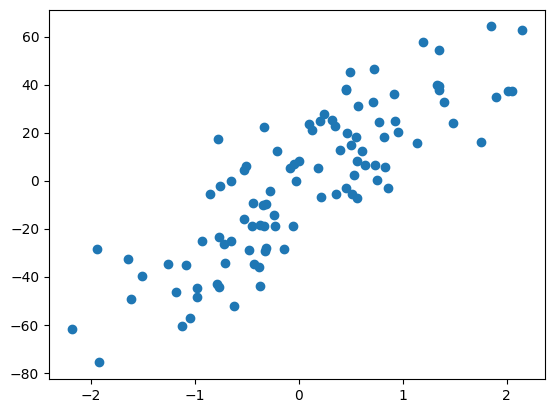

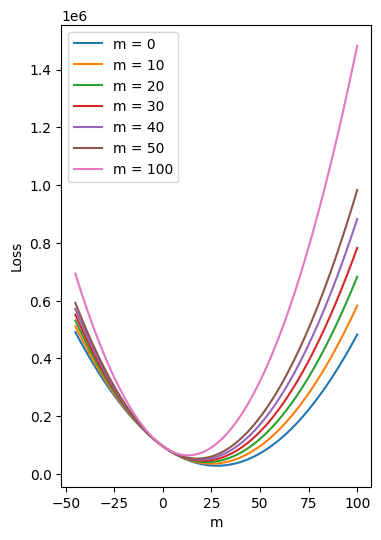

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m
def predict(m):
    return m*X - 2.29
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='m = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

2. Lasso Rigression
* This is also called L1 regression
* Here we add and absolute/mod value of w to the LOSS function.
* The Coeff can become 0 if increase the lamda too much unlike Ridge regression elimating a whole column almost like feature selection.
* Prevents Overfitting\
$$ \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} x_{ij}b_j \right)^2 + \lambda \cdot \sum_{j=1}^{p} |b_j| $$

Since beta is in mod and mod is an indifferentiable function therefore we have three cases of m:\
Lasso
for\
 m>0
$$m = \frac{\sum (y_i - \overline{y})(x_i - \overline{x})}{\sum (x_i - \overline{x})^2}$$
for m≥0
$$m = \frac{\sum (y_i - \overline{y})(x_i - \overline{x})}{\sum (x_i - \overline{x})^2}$$
for m<0
$$m = \frac{\sum (y_i - \overline{y})(x_i - \overline{x}) + \lambda}{\sum (x_i - \overline{x})^2}$$

Lasso regression causes aparcity at higher values of alpha/lamda, this is because when m is positive the summation term has to be positive as lamda is always positive.If the value of lamda and summation term in numeration becomes 0 and the whole term becomes 0 causing sparcity.\
In case of Ridge Regression lamda is a term of denominator therefore it can't make the value of any coeff/m 0.

3. Elasticnet Regression
This algo is used we are not sure if we want to 0 down a on coeff or not or may be we have too many columns.\
$ElasticNet = \sum_{i=1}^{n} (y_i - y(x_i))^2 + \alpha \sum_{j=1}^{p} |w_j| + \alpha \sum_{j=1}^{p} (w_j)^2$ \
now, to find alpha and the other alpha(let's call 'em a and b) we have L1_ratio ratio,\
L1_ratio=a/(a+b) and lamda = a+b, therefore b=lamda-a.\
In elasticnet we have to provide two hyperparameters lamda and L1_ratio.\
By default a and b both are 0.5

#Logistic Regression
Sigmoid Function is $$f(x) = \frac{1}{1 + e^{-x}}$$
loss function used in losgistic regression is called binary cross entropy - $$L_{BCE} = - \frac{1}{n} \sum_{i=1}^{n} (Y_i \cdot \log \hat{Y_i} + (1 - Y_i) \cdot \log (1 - \hat{Y_i}))$$

$\sigma(w_1x_1 + w_2x_{12} + w_3x_{13} + ... + w_nx_{1n} + w_0) = \hat{y_1}$\
$\sigma(w_1x_{21} + w_2x_{22} + w_3x_{23} + ... + w_nx_{2n} + w_0) = \hat{y_2}$\
 and so on we can calculate $\hat{y}$ for every value of output column that is y
\
\
$\hat{Y} = \sigma \begin{pmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1n} \\ 1 & x_{21} & x_{22} & \cdots & x_{2n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{m1} & x_{m2} & \cdots & x_{mn} \end{pmatrix}
\begin{pmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{pmatrix}$
\
When we want to apply gradient desecnt on Logistic regression we run a loop:\
for i in epochs:\
$w = w - \eta \frac{\Delta L}{\Delta w}$
\
$ \eta$ stand for learning rate
$$ \frac{\Delta L}{\Delta W} = -\frac{1}{m} (y - \hat{y}) x $$

##**Metrics in Logistic Regression**
**Accuracy** - Used to calculate how well our model is predicting, gives a no. between 0 and 1

**Confusion matrix** - it gives us details that what are the exact mistakes made by our model rather than just giving a score.


```
from sklearn.metrics import accuracy_score,confusion_matrix\
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))\
print("Logistic Regression Confusion Matrix\n")\
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
```

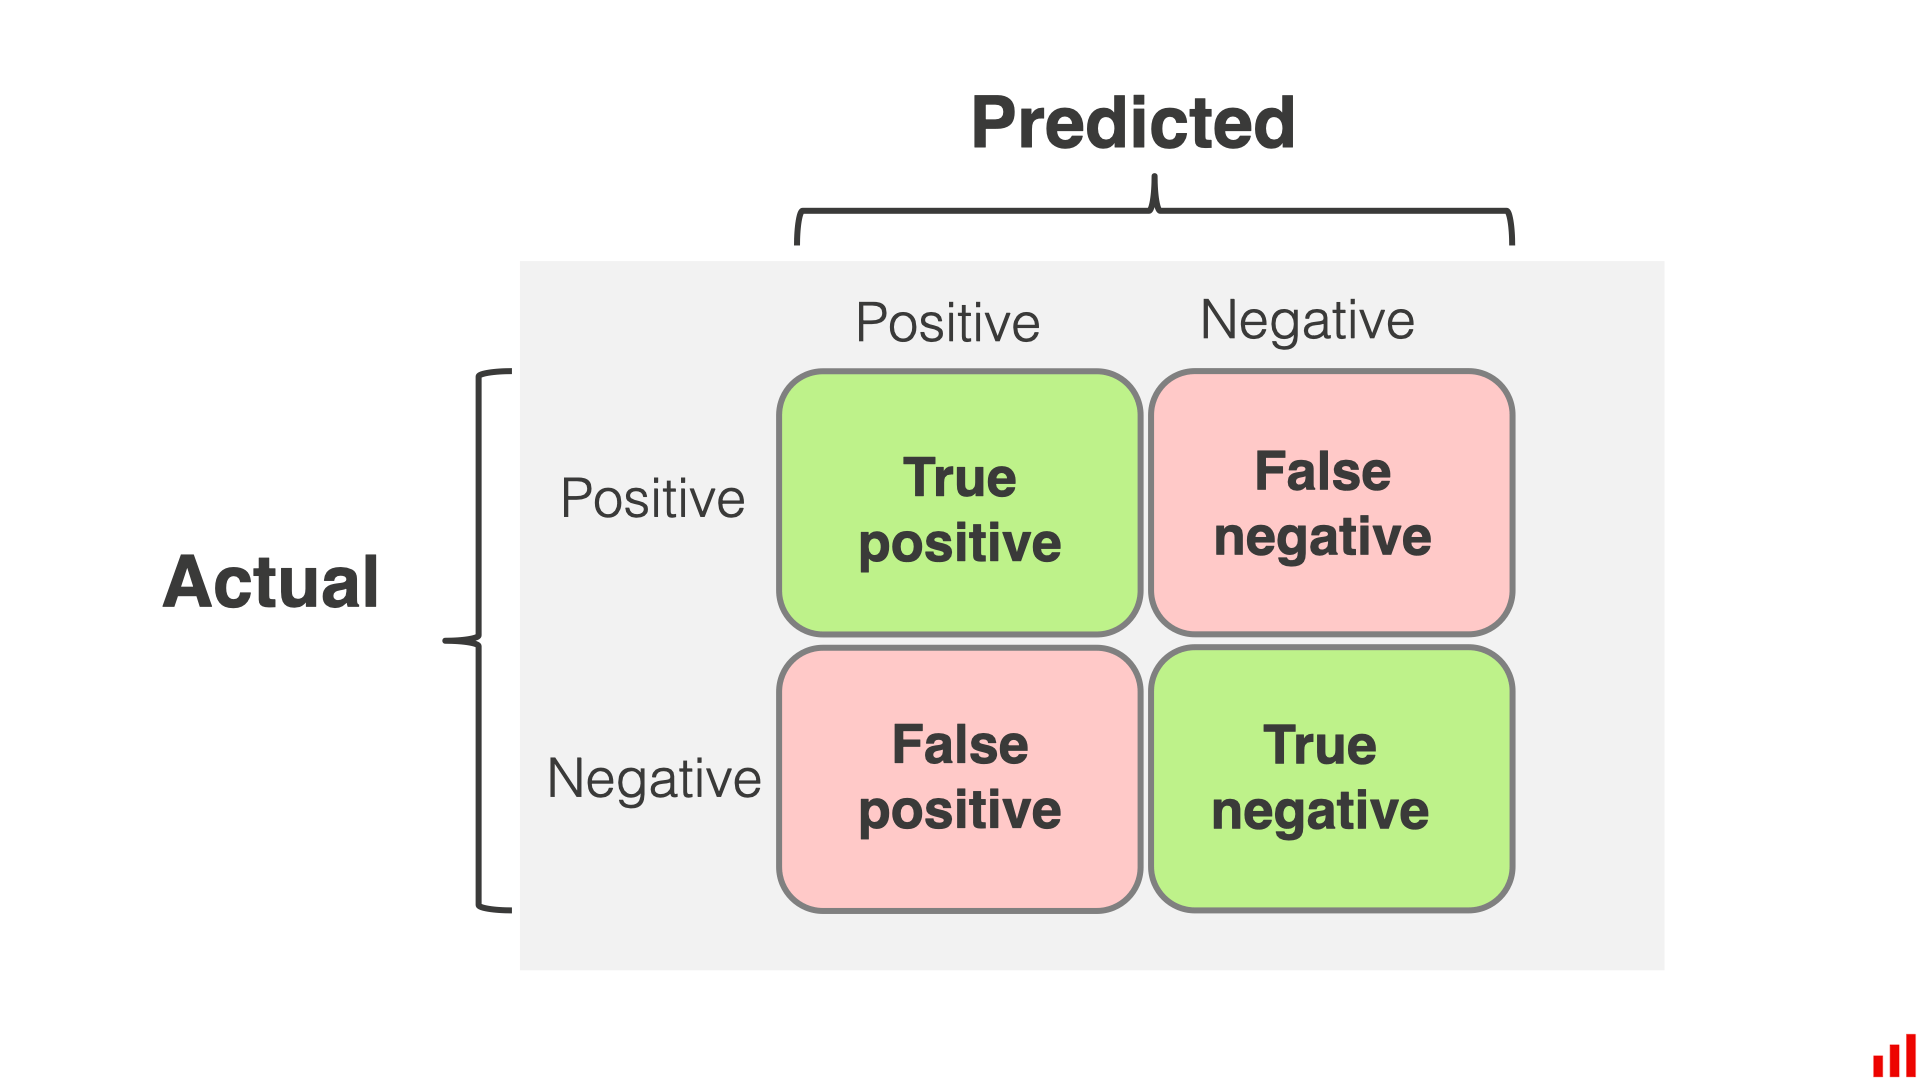

Type 1 error is an error when our model predicts the output to be 1 but it is actually 0.(FalsePositive)\
Type 2 error is when our model predicts the output to be 0 but it is actually 1(FalseNegative).
\
**Precision**- What proportion of predicted positive is truly positive.\
$$\frac {True Positive}{True positive + False Positive}$$\
**Recall**- What propotion of actual positives are correctly classified.
$$\frac {True Positive}{True positive + False Negative}$$
\
If want to avoid type 1 mistakes we will use a high precision model.\
If want to avoid type 2 mistakes we will use a high recall model.\
\
**F1 Score**- It is the harmonic mean of precision and and recall.
$$\frac {2(Precision) (Recall)}{Precision + Recall}$$\
\
When we want to calculate the **PRECISION** and **RECALL** for multiple classification.\
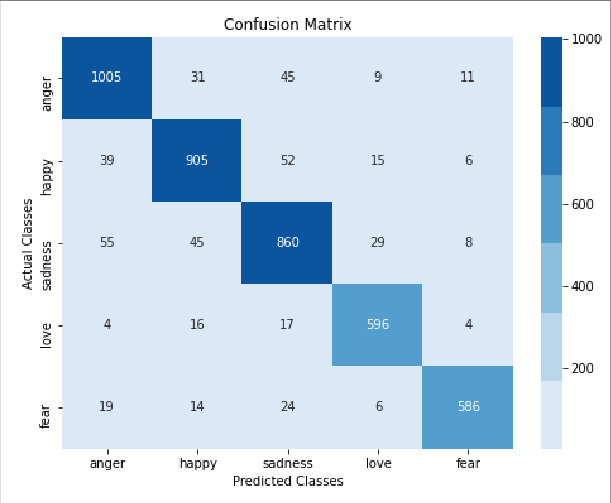
\
We calculate the precision and recall using the same formula for every class.\
Precision for anger:\
$$\frac{\text{Correctly classified as anger}}{\text{Total predictions under anger}} = \frac{1005}{1122}$$\
Similarly we move forward for every class like anger, happy,saddness, love ,fear.\
After that we can take the average of all precisions. It is called Macro Precision.\
$**OR**$\
WEIGHTED
AVERAGE OF
PRECISION

=  $$ \sum_{i=A,B,C} PRECISION_i \cdot SUPPORT_i \over \sum_{i=A,B,C} SUPPORT_i $$

= $$ {P_A \cdot S_A + P_B \cdot S_B + P_C \cdot S_C \over S_A + S_B + S_C} $$
\
Recall for anger:\
$$\frac{\text{Correctly classified as anger}}{\text{Sum of the anger row(actual no of angery people)}} = \frac{1005}{1101}$$\
\
Similarly we can calculate the F1 score for each individual class and then take macro F1 or weighted average.\
\
$$\text{We can put together a report for all this with one line of code for every fucking class}$$
```
# from sklearn.metrics import classification_report\
print(classification_report(y_test,y_pred1))
```
##**Softmax Regression**
SOFTMAX FUNCTION

$$s(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$

Its loss function is very complicated.
$$Loss = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}log(\hat{y}_{k}^{(i)})$$
\
in case we have 3 different classes 1,2,3 then after solving this loss function we will get \
L = $y_1^{(1)} log(\hat{y}_1^{(1)}) + y_2^{(2)} log(\hat{y}_2^{(2)}) + y_3^{(3)} log(\hat{y}_3^{(3)})$
\
Now we will calculate the $\hat{y}$ using gradient descent.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


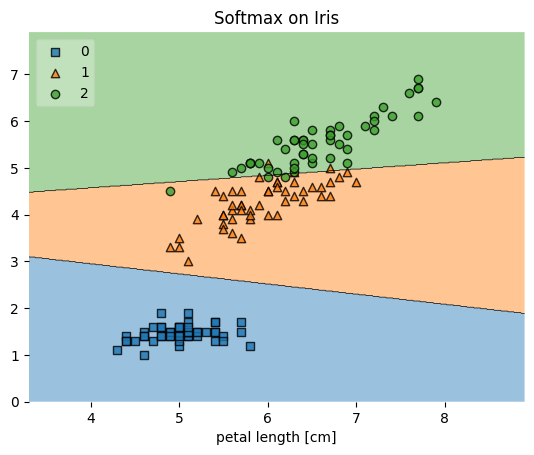

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df = df[['sepal_length','petal_length','species']]
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

## Decision Trees
Mathematically speaking decsion trees are hyperplanes that cut a high dimentional graph and run parallel to any one of the axis to cut your coordinate system into hypercuboids.\
\
Advantages
1. Intuitive and easy to understand
2. Minimal data preparaion is required
3. The cost of using the tree is logarithmic to the no. of data points

Disadvantages
1. Prone to overfitting
2. Prone to errors in an imbalance dataset

Entropy - It is a quantity that basically measures uncertainity in a system. for 2 or more class the min entropy is 0 and max entropy can be more than 1.
\
$$Entropy = - \sum_{i=1}^{n} p(i) \log_2 p(i)$$
\
$$\text{Information Gain} = \text{Entropy (parent) - [weighted average] Entropy (children)}$$

When a data set is given trained on decision tree model the model first splits the data based on a single column and then calculates the information gain.It then runs a greedy search algorithm to find the max.information gain and split on basis of that. Untill the entropy becomes 0 i.e we have reached the leaf.\
Also we can use gini impurity in place of entropy as it functions exactly the the same but is computationally a bit fast as we have on calculate squares and not logs
$$Gini = 1 - \sum_{i=1}^{n} (p_i)^2$$

Hyperparameters of Decision Tree
1. **Max_Depth** - this hyperparameter decide the depth of the tree if we keep the default value of none then the tree will grow too much and show overfitting and if we keep it in control we can prevent that.
2. **Min Sample Split** - This parameter will stop our decision tree from growing too deep. If the value of min_sample_split is 100 then the tree will not split further if a node has less than 100 rows in it.\
If value of the hyperparameter is too much then model will underfit.
3. **Max_leaf_nodes** - This controls the no. of leaves we will have in our decision tree.
4. **Min_Impurity_dec** - This parameter decdates when we will make a split in our tree. If the decrease in impurity is less than the set value of this parameter than the said split will not happen. This will decrease overfitting.
\
**Regression Tree**- Generally we use decison tree only for classification problem but sometimes we can use this on a regression problem as well. It uses the same hyperparameters as decision tree.\
\
In regression tree we calculate the the variance reduction for every single node and leaf. whereever the variance reduction is the highest, that is where the split is done.\
The variance of the target variable in a node is:\
S is the set of training samples.

$$Var(S) = \frac{1}{|S|} \sum_{i \in S} (y_i - \bar{y})^2$$

```
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)\
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)
```
**Importance** tells us the importance of each column,if in case we want to do feature selection we can remove the least important columns.

$$\text{Best way to visualize your decision tree is through dtreeviz library}$$


In [ ]:
!pip install -q dtreeviz
import dtreeviz
import graphviz.backend as be
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)
viz = dtreeviz.model(clas,
               X_train,
               y_train,
               feature_names=iris.feature_names,
               class_names=["setosa", "versicolor", "virginica"])
viz

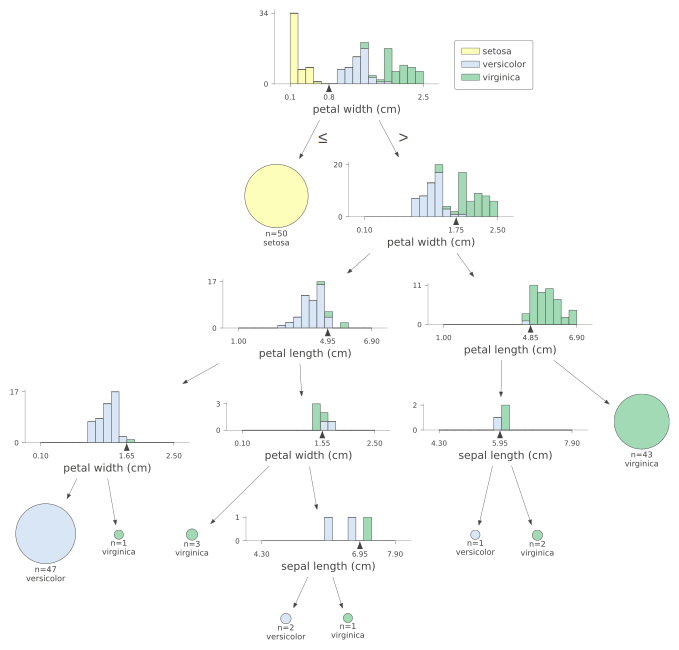

In [ ]:
viz.view(scale=1.2)

In [ ]:
clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz.model(clas,
               X_train,
               y_train,
               feature_names=iris.feature_names,
               class_names=["setosa", "versicolor", "virginica"],
               )
viz

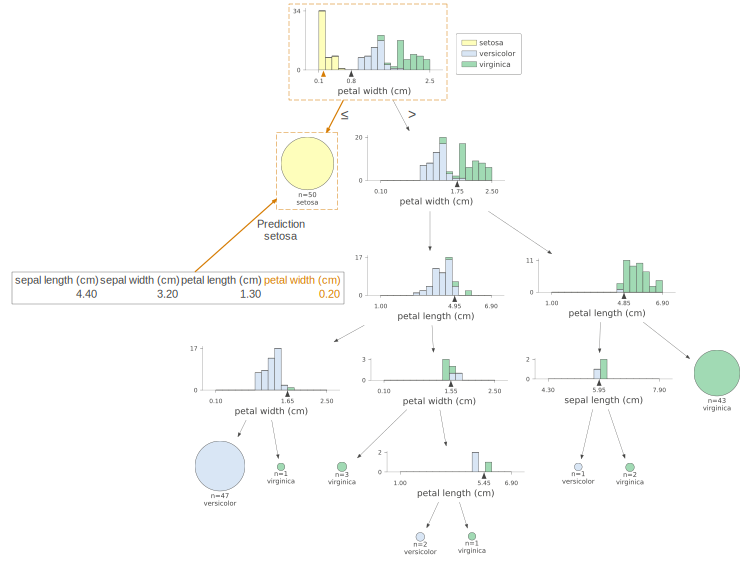

In [ ]:
viz.view(x=X)

##Ensemble Learning
1. Voting
2. Bagging
3. Boosting
4. Stacking
\
$$\text{Voting Ensemble}$$
* In this technique we give same data to different machine learning models and then take the results from them. Majority of all the results is taken as the final value.
* These models need to be different and independent as much as possible.
* Every model needs to have an accuracy greater than 50% atleast.
* **Hard and soft voting**: Hard voting is default that is what is defined above. Soft voting means that the model will take the average of probabilities of getting output as 1 and 0 from all the models and whichever has higher average out of 0 and 1 will be the final result. Soft voting is sometimes better.
$$\text{Stacking Ensemble}$$
In this technique a sepaprate machine learning model is deployed at the end of the ML pipeline which collects data from all of the models and then predicts the result. Since weights are attched to every models output therefore it pripotizes models which usually gives better results.\
$$\text{Bagging Ensemble}$$
Stands for Bootstrapped Aggregation. We Bootstrap or divide the data before giving it to the models and then finding the majority.All the models are same. Eg- Random forest is a collection of decision trees. It decreases the varience of our models.


```
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42)
bag.fit(X_train,y_train)

#Pasting
pasting = BaggingClassifier(
          base_estimator=DecisionTreeClassifier(),
          n_estimators=500,
          max_samples=0.25,
          bootstrap=False,
          random_state=42,
          verbose = 1,
          n_jobs=-1)

#Random Patches
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42)

# Out Of Bag Samples = Generally when we are selecting random rows with replacement=true 37% rows are not actually used for training we can use those rows to test our model.
bag = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=500,
        bootstrap=True,
        oob_score=True,)
bag.oob_score_

```

```
# Gridsearch CV is used to do the hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50,100,500],
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)
search.fit(X_train,y_train)
search.best_params_

```


**Bagging Tips**
* Bagging generally gives better results than Pasting
* Good results come around the 25% to 50% row sampling mark
* Random patches and subspaces should be used while dealing with high dimensional data
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

**Random Forest**
one of the machine learning algoritm for regresion as well as classification problems.\
The difference between a bagging of many decision trees and a random forest is that bagging will apply sampling at a tree level and random forest applies sampling at node level. This introduces more randomness in the random forest making it more accurate and decreaces it's variance.
* For optimum results we should keep the max sample somewhere in the range of 50-75%.

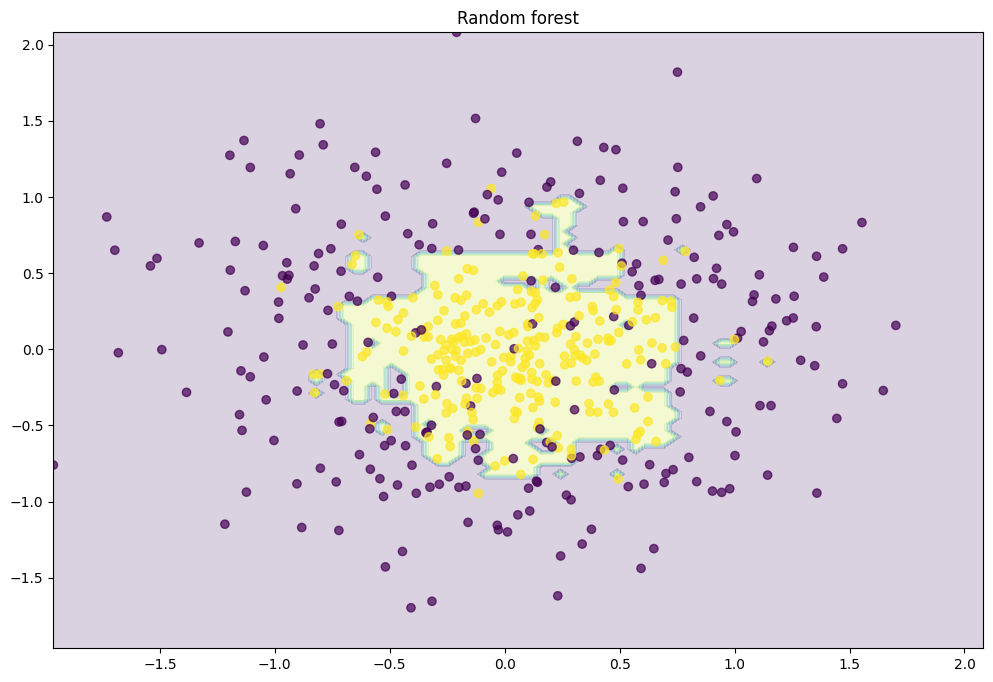

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

##Grid Search CV - Best thing for hyperparameter tuning
\


```
# Number of trees in random forest
n_estimators = [20,60,100,120]
# Number of features to consider at every split
max_features = [0.2,0.6,1.0]
# Maximum number of levels in tree
max_depth = [2,8,None]
# Number of samples
max_samples = [0.5,0.75,1.0]
```
```
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }

rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       n_jobs = -1)
```

```
rf_grid.fit(X_train,y_train)
rf_grid.best_params_
rf_grid.best_score_
```

## Random SearchCV
When we have a huge huge data running grid search CV and running for the best possible result becomes too computationally expensive so we try to randomly pick from the results and hope for the best Hyperparameters.

```
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
```
```
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
```

```
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)
```
```
rf_grid.fit(X_train,y_train)
rf_grid.best_params_
rf_grid.best_score_
```





##Feature Importance
```
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X,y)
rf.feature_importances_
sns.heatmap(rf.feature_importances_.reshape(28,28))

```
$$f_{Ii} = \frac{\sum_{j:node \ j \ splits \ on \ feature \ i} n_{Ij}}{\sum_{k \in all \ nodes} n_{Ik}}$$

$$n_i = \frac{N_t}{N}[impurity - (\frac{N_{t(right)}}{N_t}* right \ impurity) - (\frac{N_{t(left)}}{N_t}* left \ impurity)]$$
where\
 $N_t$ is number of rows that particular node has

N is the total number of rows present in data

Impurity is our gini index value

$N_{t(right)}$ is number of rows in right node

$N_{t(left)}$ is number of rows in left node

**If in case we have high cardinality in our data that is we have many unique values then this method can give bit incorrect results in that case use sklearn.inspection.permutation_importance**

##Adaboost
$$Performance \ of \ the \ stump = \frac{1}{2}log_e(\frac{1 - Total \ Error}{Total \ Error})$$
\
For Correctly classified samples:
$$New \ Sample \ Weight = Sample \ Weight * (e^{-(Amount \ of \ Say \ / \ performance \ of \ stump)})$$
For Incorrectly classified samples:
$$New \ Sample \ Weight = Sample \ Weight * (e^{(Amount \ of \ Say \ / \ performance \ of \ stump)})$$

In adaboost we train different models of same data sequentially, and let the next model know the mistakes or errors made by the previous model.\
To do this we increase the weight of the incorrectly classified samples and use upsampling to make the next model better.\
In adaboost we use decison stumbs.\
Each model has a different wrightage in the final result based on the their performance.


##Bagging Vs Boosting

Bagging is used for Low Bias and High Variance models.\
Boosting is used for High Bias and Low Variance models.\
\
In Bagging all the models are trained parallely.\
In Boosting all the models are trained sequentially(first model tells it shortcoming to the second model and so on...).\
\
In Bagging the weightage of every base learner is same.\
In Boosting every model is given a weightage according to it's performance.


##K-means Clustering
* Give the no. of clusters you want to form.
* The algo will pick randomly centroids.
* It will then start to calculate euclidian distance from all the points around the centroid and adjust the centroid accordingly.

```
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
X = df.iloc[:,:].values
km = KMeans(n_clusters="ELBOW CURVE")
y_means = km.fit_predict(X)
```




##Gradient Boosting
Since it is boosting technique therefore it is a sequential/stagewise model.
* The first model here just takes the average of the column.
* The loss is called pseudo-residual i.e ${Y_i - f_i(x_i)}{} $.
* The second model and the models there on are decision trees which are employed to calculate the error made by the previous models.(max_depth =8 to 32)
* For these trees the input columns are same, just the output column is the pseudo-residual column.
* After that the data from the second model and so on we multiply them with learning rate which is usually 0.1. LR adds to the randomness of the model.
* This adding is called additive modelling. we take weak learner or models with high bias and using additive modelling try to make a low bias low variance model.

###Mathematics of Gradient Boosting
* As I mentined before we take the mean of the resultant column as the first model. Now, this is the mathematical explanation for why it happens?

 $$\arg \min_\gamma \sum_{i=1}^N L(y_i, \gamma)$$
 This is the function for the first model. Here we have to minimize the value of the equation as much as possible by changing gamma (optimization problem). For that we will do the partial differentiation of this functin w.r.t to $γ$ and equate it with 0. We get a final equation which finds mean of the column.\
 \
 **NOTE - OUR LOSS FUNCTION HERE IS $$L = \frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$**
 **1/2 is multiplied to decrease the computational complexity.**
\
Step 2: Run a loop and range is going to be the no. of decision trees we want to use in boosting.
$$r_{im} = - \left[ \frac{\partial L(y_i, f(x_i))}{\partial f(x_i)} \right]_{f = f_{m-1}}$$
i = row no.\
m = the decisin tree for which we are calculating.\
r = pseudo residual \
\
We use the below formula to calculate the values of the output from decision tree. j= terminal region
$$ \gamma_{jm} = \arg \min_\gamma \sum_{x_i \in R_{jm}} L(y_i, f_{m-1}(x_i) + \gamma).$$

The formula below is used to calculate the boosting after the first function.Since m stand for decision tree we can add as many trees as we want.
$$f_m(x) = f_{m-1}(x) + \sum_{j=1}^{J_m} \gamma_{jm} I(x \in R_{jm}).$$

###Gradient Boosting for classification

* Here, the major difference is that the first model is a log of odds i.e log$(\frac{\text{No. of 1s}}{\text{No. of 0s}})$.
* Next we have to calculate the error between our first model and the orginal output . But we can't compare directly as these are different values. Therefore convert log of odds to probability.
The formula to convert log-odds (log odds) into probability (p) is given by the logistic function:\
$$p = \frac{e^{log \space odds}}{1 + e^{log \space odds}}$$
* Then pseudo-residual is calculated by subtracting the probablity from the y column value for each row. Then results from these two are forward to 3rd one.
* The final output of all the decision trees is taken in log of odd form.\
 **Imp Video**\
https://youtu.be/mELtxVUNNrw?si=xOxtinfanOUXSoaf \
Geometric Intuition\
https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e

###Difference between adaboost and gradient boost
Adaboost
* Each tree has different weightage.
* It uses decision stumbs

Gradient Boost
* Each tree has same learning rate.
* It uses decisin tree with depth of 8 to 32.



##Stacking
In stacking we train different models on the same dataset and take their predictions. After that, all the prediction are fed as input columns into a metamodel which is actually another ML model which predicts the final result.
\
Stacking can be implemented in 2 different ways:
1. Blending


Split the data: Divide the training data into two parts:

A large training set to train the base models.
A smaller validation set to generate predictions from the base models.
Train base models: Train multiple models (e.g., decision trees, SVMs, neural networks) on the large training set.

Generate predictions: Use these trained base models to make predictions on the smaller validation set.

Combine predictions: Use a simple model (e.g., logistic regression or a weighted average) to combine the predictions from the base models on the validation set. This simple model is called the meta-model.

Final prediction: Use the trained meta-model to predict on the test data by combining predictions from the base models.

2. K-fold Approach

Split the dataset:

Divide the data into
k equal-sized subsets (folds).
For example, if
k=5, the data is divided into 5 folds.
For each of the
k iterations (or folds): \
Use one fold as the validation set.
Use the remaining
k−1 folds as the training set.\
Train the model on the training set and evaluate its performance on the validation set.\
Rotate the validation fold so that every fold is used exactly once as the validation set.\
Aggregate results:

After
k iterations, you’ll have
k performance metrics (e.g., accuracy, precision, etc.) from the validation sets.
Calculate the average of these metrics to estimate the model's overall performance
\
For a dataset split into 5 folds ($F_1$, $F_2$, $F_3$, $F_4$, $F_5$):
1. Iteration 1:
• Training set: $F_2$ + $F_3$ + $F_4$ + $F_5$ \
• Validation set: $F_1$
2. Iteration 2:
• Training set: $F_1$ + $F_3$ + $F_4$ + $F_5$ \
• Validation set: $F_2$
.....


##Hierarchial Clustering
1. Agglomerative Clustering \

Initially, each data point is treated as a separate cluster.\
Compute similarities or distances:

Calculate the distance (or similarity) between all pairs of clusters. Common distance metrics include:
* Euclidean distance
* Manhattan distance
* Cosine similarity

Merge the closest clusters:
Identify the two clusters that are the most similar (or closest) based on the chosen metric.
Merge them into a single cluster.\
Update the distance matrix:

Recalculate the distances between the new cluster and all remaining clusters using a **linkage criterion**.
Continue merging clusters iteratively until all data points are grouped into a single cluster or until a specified number of clusters is reached.



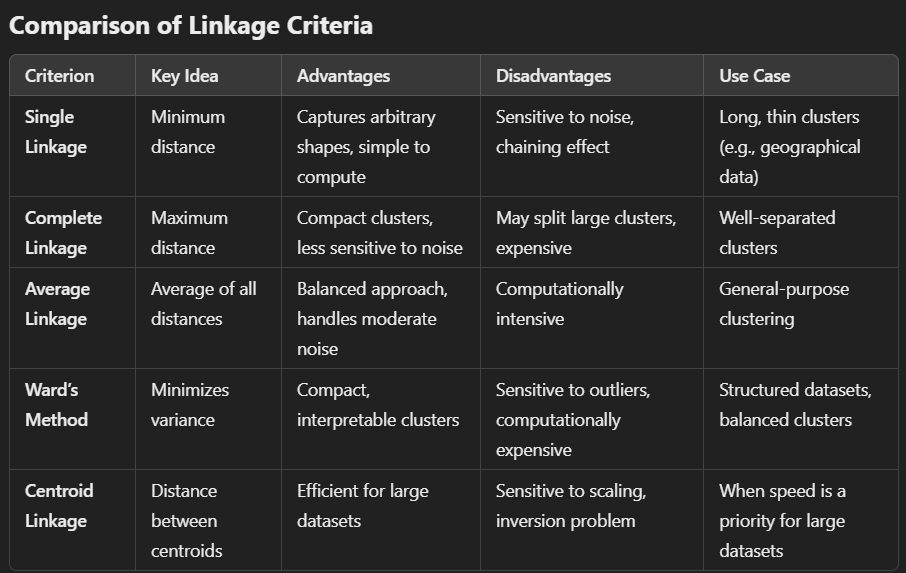

Choosing a Linkage Criterion
* Single Linkage: When you suspect clusters have irregular or elongated shapes.
* Complete Linkage: When you need tight, well-separated clusters.
* Average Linkage: A good default if you want a balance between chaining and compactness.
* Ward’s Method: Best for structured data where you expect compact and similar-sized clusters.
* Centroid Linkage: For large datasets where computational efficiency is important.

###Agglomerative Hierarchial clustering can't be used for huge dataset as it creates n*n matrix during computation making it very inefficient.

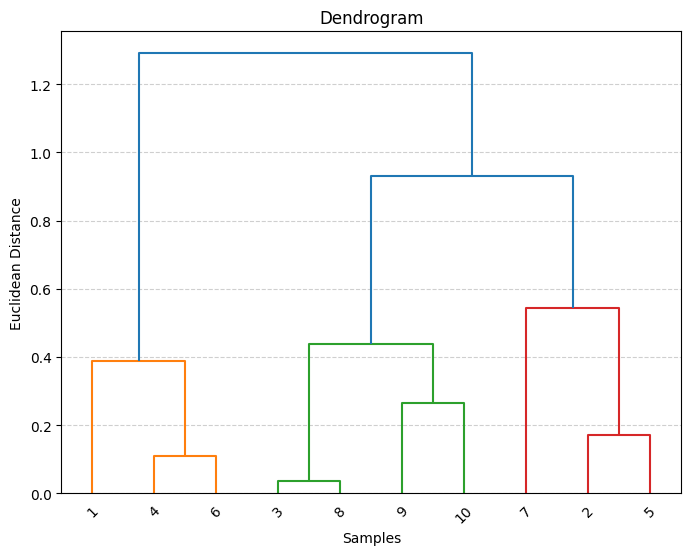

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Creating an imaginary dataset
np.random.seed(42)  # For reproducibility
data = np.random.rand(10, 2)  # 10 samples, 2 features

# Performing hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=range(1, 11), leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##K-Nearest Neighbour
* Standard scaling is imp for every column.
* Select how many neighbours you want to choose. BY default 5.
* To slect the best value of K we use experimantation on different value of K and plot a graph to figure out the best one.
* We can use the library MLXTEND to visualise **Decison Surface** for 2D and 3D data.
* If K is too low it causes overfitting and if K is too high it causes underfitting.

**Limitations of KNN**
* Do not use it in case of a huge dataset.\
KNN is a lazy learning Algorithm so it learns when a query point is given to it. This makes the training process super-fast but the prediction is slow.
* Do not use in High Dimentional data.
* KNN does not work great with outlyers.
* Do no use in case of imbalanced data.
* Cannot tell which feature heps us more in prediction.




## Support Vector Machine
* In this algorithm we try to draw the Margin Maximizing Hyperplane.\
How do we find it?
  * Draw a hyperplane.
  * Now draw parallels to the hyperplane.
  * Stop at a point where these parallels meet a data point. These data point are called **Support Vectors**.
  * The distance between these parallels is called margin and we adjust our plane to maximise this margin.
* SVMs are robust to outlylers.
* SVMs can be used for both regression and classification.
* SVMs can be used for Non-linear data using kernels.\
Kernel Trick\
Instead of manually transforming the data to a higher dimension, SVM uses a kernel function to compute the dot product in that higher-dimensional space without explicitly performing the transformation. This avoids the computational cost of working in high-dimensional space.

###Mathematics of Hard Margin SVM
The optimal hyperplane maximizes this margin while ensuring correct classification. The closest points satisfy:

$$y_i(w^T x_i + b) \ge 1$$

where:\
w is the weight vector (normal to the hyperplane),\
x is the input vector,\
b is the bias (intercept term). \
$w^T$ = transform of w

The margin is the distance between the hyperplane and the closest data points (support vectors). The distance from a point $x_i$ to the hyperplane is given by:
$$ \frac{|w^Tx_i + b|}{||w||} $$

To handle cases where data is not perfectly separable, we introduce slack variables §i:
yi(wxi +b) ≥1-ği, &i≥0
The new objective function becomes:
N
min
1
w,b,§ 2
i=1
where C is a regularization parameter controlling the trade-off between margin maximization and
classification errors.

The margin is:
$$ \frac{2}{\|w\|} $$
Thus, maximizing the margin is equivalent to minimizing $$ \max_{w, b} \frac{2}{\|w\|} $$

To handle cases where data is not perfectly separable, we introduce slack variables ξi:

$$y_i(w^T x_i + b) \ge 1 - \xi_i, \quad \xi_i \ge 0$$

The new objective function becomes:

$$\min_{w, b, \xi} \frac{1}{2}||w||^2 + C \sum_{i=1}^N \xi_i$$

where C is a regularization hyperparameter controlling the trade-off between margin maximization and
classification errors.\
Too big of a value for C will cause overfitting.\
Too small of a value for C will cause underfitting.\
$ξ$ is called hinge loss.
\
\
When we want to use SVM on a non-linear data. SVM uses kernels.KErnels basicallly add a new dimension to our data, while keeping the essence of our original data intact,of course. And then, uses linear SVM for classification.
1. Polynomial Kernel
This kernel maps data into a higher-degree polynomial space.
$$K(x, y) = (x^T y + c)^d$$
•	$x \cdot y$ is the dot product of the input vectors.\
•	c is a bias term (helps control flexibility).\
•	d is the degree of the polynomial.\
👉 Effect: Captures curved decision boundaries. Useful for problems with moderate complexity.

2. Radial Basis Function (RBF) Kernel
This kernel maps data into an infinite-dimensional space using Gaussian similarity.
$$K(x, y) = exp\left(-\frac{||x - y||^2}{2\sigma^2}\right)$$
•	$||x - y||^2$ is the Euclidean distance between points.\
•	$\sigma$ controls the spread of the function.\
👉 Effect: Creates smooth, flexible decision boundaries. Suitable for highly non-linear problems.

3. Sigmoid Kernel
This kernel is inspired by neural networks (MLPs with one hidden layer).
$$K(x, y) = tanh(x \cdot y + c)$$
• α is a scaling parameter.\
• c is a bias term.\
• tanh is the hyperbolic tangent activation function.\
👉 Effect: Similar to neural networks, useful when decision boundaries resemble an S-shape.
**RBF is the most widely used due to its flexibility**

##Bayes Theorem
$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Eg:if we have a dataset with input columns $x_1, x_2, x_3, x_4.....x_n$ and output column y then the bayes theoren can be applied like this:

$P(Y/x_1, x_2, x_3, x_4.....x_n) = \frac{P(Y) * P(x_1, x_2, x_3, x_4....x_n/y)}{P(x_1, x_2, x_3 - -x_n)}$

$= \frac{P(y) * P(x_1/y) * P(x_2/y) * P(x_3/y)......P(x_n/y)}{P(x_1) P(x_2) P(x_3).....P(x_n)}$

The denominator is not calculated as it is same/constant both in case of probablity is yes/no.

##XG Boost
1. Similarity Score is used to measure node quality in XGBoost, computed as:
$$ \frac{G^2}{H + \lambda} $$
2. Splitting Decision is based on Gain, which evaluates whether splitting a node improves predictive performance:
$$ Gain = \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{G_P^2}{H_P + \lambda} - \gamma $$
Where:\
•	*G* is the sum of gradients (first-order derivative of loss).\
•	*H* is the sum of hessians (second-order derivative of loss).\
•	λ is the L2 regularization term.\
•	γ is the pruning threshold (if the gain is less than γ, the split is not made).
Gradients & Hessians for Logistic Regression

This represents the second derivative of the logistic loss, capturing the curvature of the loss function.
3. XGBoost vs. Traditional GBDT:\
• Uses gradient and Hessian-based splitting instead of simple impurity measures.\
• Employs pruning and regularization to prevent overfitting.\
• Is computationally efficient, making it suitable for large datasets.

Pruning Process\
• XGBoost first grows the tree to its full depth.\
• Then, it prunes back nodes where the gain is lower than γ.\
• This avoids unnecessary splits, making the model more efficient.

###Classification using XGboost
**Similarity Score Formula (Classification - Logistic Loss)**
For a given node, the similarity score is computed as:

Classification

$$\frac{(\sum Residual_i)^2}
 {\sum [P_i \times (1 - P_i) + \lambda]}$$

$gain =(SS_{Left} + SS_{Right}) - SS_{root}$ \
The output value of leaf node is calculated using:\
Output Value = $$\frac{(\sum Residuals)}{\sum_{}^{N}[P(1-P)] + \lambda}$$


## DBSCAN
DBSCAN is a clustering algorithm that groups points based on their density, making it effective for discovering clusters of arbitrary shape and identifying noise (outliers). Unlike k-means, it does not require specifying the number of clusters in advance.

DBSCAN relies on two parameters:\
𝜀(Epsilon, radius parameter): Defines the radius of the neighborhood around a point.\
minPts (Minimum Points): The minimum number of points required in a neighborhood for a point to be considered a core point.

**Core Point:**\
A point with at least minPts neighbors (including itself) within a radius
𝜀.It is dense enough to start a cluster.\
**Border Point:** \

A point that does not have enough neighbors to be a core point.\
However, it is within the neighborhood of a core point, so it belongs to a cluster.\
**Noise Point (Outlier):** \

A point that is neither a core nor a border point.\
It does not belong to any cluster and is treated as an outlier.

Given a dataset D, ε, and minPts:
1. Select an unvisited point  $X_i$ and mark it as visited.
2. Find its ε-neighborhood:
3. Classify the point:
• If $X_i$ is a core point, start a new cluster.
• If $X_i$ is a border point, add it to an existing cluster.
• If $X_i$ is noise, mark it as an outlier.
4. Expand the cluster:
• Recursively visit all directly density-reachable points.
• Continue expanding until no more points can be added.
5. Repeat for all unvisited points.
6. Stop when all points are visited.



## Imbalanced Data
When we have to many data points of one class in our dataset it becomes extremely difficult for models classify the minority accurately. We can use some techniques to fix this:
All these techniques are implemented in **imblearn** library.

1. Random Undersampling:
We randomly select data points from the majority class which is equal to the no. of data points in the minority class.
* This remove the bias from the majority class
* Although it can cause us to miss some pattern in the data.
* This makes training fast.
* Can cause underfitting.

2. Oversampling:
We make dupliccates of the mi ority class so that we can equate the no. of data points in majority and minority class.
* It can cause overftting
* Training becomes slow.

3. SMOTE
How SMOTE Works\
Select a Minority Class Instance: A random data point from the minority class is chosen.\
Find Nearest Neighbors: The k-nearest neighbors (typically k=5) of this point are identified within the minority class.\
Generate Synthetic Points: A new synthetic sample is created by interpolating between the selected point and one of its neighbors.\

Using SMOTE:
• A fraudulent transaction A is chosen.
• One of its k-nearest neighbors B is identified.
• A synthetic data point is generated as follows:
$$S = A + \lambda(B - A)$$
where $\lambda$ is a random number between 0 and 1.
This new synthetic point S lies along the line connecting A and B, helping balance the dataset.


Disadvantages
1. Does Not Handle Categorical Data Well
2. Computational Complexity
3. Dependency on the Choice of Neighbors
4. Sensitive to Outliers
5. Balance Achieved May Not Reflect True Nature

###We can also change the class_weight parameter in our ML algorithm while training to make it more sensitive to errors. Defining a custom Loss finction also helps.

In [4]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-fonts-recommended set to manually installed.
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-plain-generic set to manually installed.
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!jupyter nbconvert --to pdf /content/All_algos.ipynb


[NbConvertApp] WARNING | pattern 'All_algos.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    E